In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "D:\semestre9_ISMIN\Embedded_AI\wine2\winequalityN.csv" #/kaggle/input/wine-quality/winequalityN.csv
df = pd.read_csv(path)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Overview


* As we can see, the dataset consists of 6497 records and 12 attributes. The aim of the problem is to predict the quality (the 13th column) of the dataset.


# Let's observe the data's features!

* Firstly, let's observe the first 5 records of the dataset:

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* We can see that they are all white wine, the quality of them are all 6. Let's see how many record of each type (white, red) there are.

In [5]:
print("Number of white wine: " + str(sum(df["type"] == "white")))
print("Number of red wine: " + str(sum(df["type"] == "red")))

Number of white wine: 4898
Number of red wine: 1599


* We can see that the dataset consists of 4898 records of white wine and 1599 records of red wine.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

[]

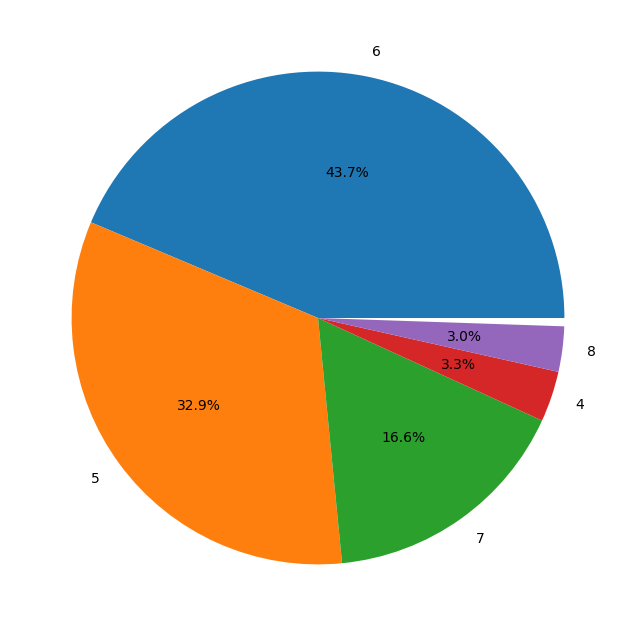

In [8]:
y = df['quality'].value_counts().tolist()
x = [6, 5, 7, 4, 8, 3, 9]

plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(y, labels=x, autopct='%1.1f%%',)
patches[-2].set_visible(False)
texts[-2].set_visible(False)
autotexts[-2].set_visible(False)
patches[-1].set_visible(False)
texts[-1].set_visible(False)
autotexts[-1].set_visible(False)
plt.plot()

* The dataset assigns the range of the label from 1 to 10, however there are only 7 unique values: 3, 4, 5, 6, 7, 8, 9. The labels are also heavily imbalanced, where 6 is the most appeared feature (with 2836 records) where 9 has the least appearances (only 5 times).

In [9]:
 df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

* Among the features, there are 7 features with missing values, but with small amount (the maximum records with a feature missing is 10)

In [10]:
df.isnull().any(axis=1).sum()

34

* Among 6497 records, there are only 34 records that has missing values. 
* Hence, to resolve the problem we can delete them or replace them with the mean value of the values in that column.

ajout pour regler l'erreru de df.fillna(df.mean())

In [38]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index([], dtype='object')


essaie de regler probleme

In [16]:
numeric_columns = df.select_dtypes(include=[np.number])
print(numeric_columns)
df[numeric_columns.columns] = df[numeric_columns.columns].fillna(numeric_columns.mean())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Let's try to fill the missing columns with the mean of the column's value.

In [11]:
df = df.fillna(df.mean())

TypeError: Could not convert ['whitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhitewhiteredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredredred'] to numeric

In [17]:
 df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* Now there are no missing values left. We then check the type of value in each column.

In [18]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

* Only the "type" column consists of categorical attributes(white and red), while other features are all in float type. We can assign the feature to the "type" column as follows:

In [19]:
# change type of white wine into 1 and red wine into 0
df["type"] = df["type"].replace(["white", "red"], [1, 0])

# fill 0 in blank information
# df.fillna(0, inplace =True)

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


## Now we get insight of the dataset!

<bound method IndexOpsMixin.value_counts of 0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
6492    6.2
6493    5.9
6494    6.3
6495    5.9
6496    6.0
Name: fixed acidity, Length: 6497, dtype: float64>


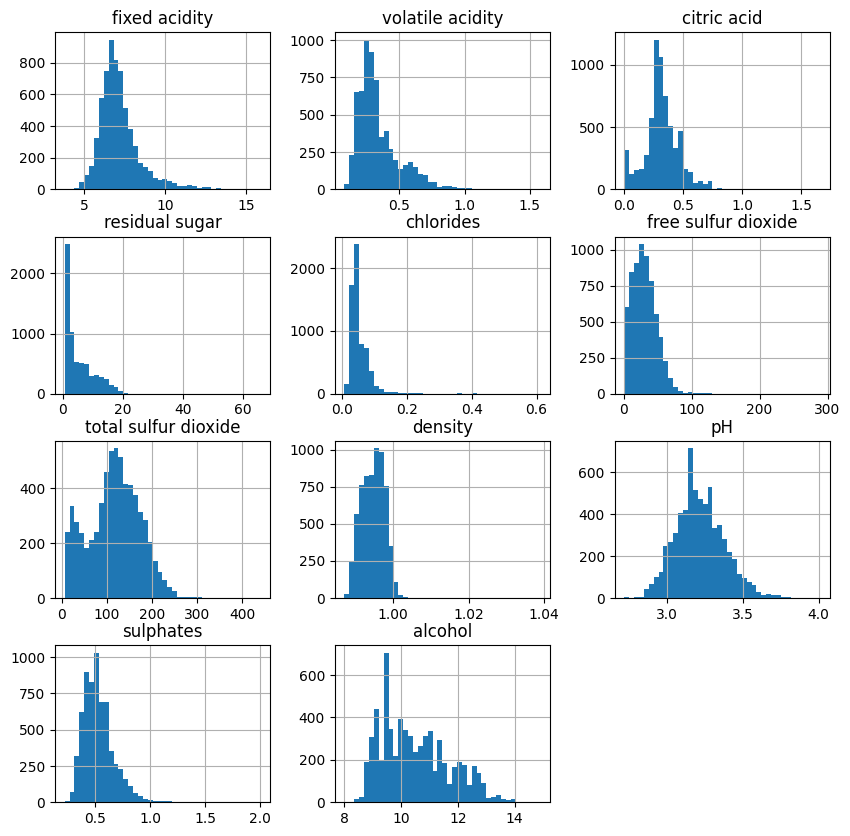

In [20]:
# features = df.columns.tolist()
# for label in features[1:]:
#     plt.figure(figsize = (8, 6))
#     plt.boxplot(df[df["type"] == 1][label])
#     plt.title(label + ' of white records')
#     plt.ylabel("Values")
#     plt.show()
#     plt.figure(figsize = (8, 6))
#     plt.boxplot(df[df["type"] == 0][label])
#     plt.title(label + ' of red records')
#     plt.ylabel("Values")
#     plt.show()
features = df.columns.tolist()
df[features[1:-1]].hist(bins = 40, figsize = (10, 10))
print(df['fixed acidity'].value_counts)

* From the plot we can see that overall the values are distributed well. 

0.9196595253692106


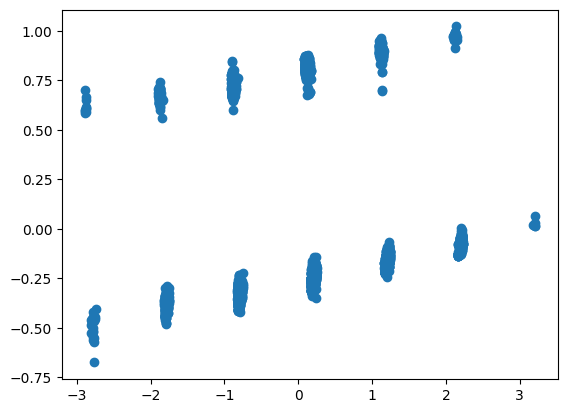

In [21]:
def scale_data(df):
    scaled_df = pd.DataFrame()
    last_column = df.columns[-1]  # get the last column (quality) of data
    for column in df.columns:
        if column != last_column:
            min_val = df[column].min()
            max_val = df[column].max()
            scaled_column = (df[column] - min_val) / (max_val - min_val)
            scaled_df[column] = scaled_column
        else:
            scaled_df[column] = df[column] # keep the last column unchanged
    return scaled_df

scaled_data =scale_data(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
X = df.drop(["quality"], axis = 1)
Z = pca.fit_transform(scaled_data)
print(np.sum(pca.explained_variance_ratio_))
# y = df["quality"]
# ax = plt.axes(projection='3d')
# ax.scatter3D(Z[:,0], Z[:,1], y, c=y, cmap='Greens');
plt.scatter(Z[:, 0], Z[:, 1])

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.471644,0.700357,-0.390645,-0.328514,-0.486662,0.032970,0.119323
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


* We can see that some attributes are pairwise highly correlated (e.g type and free sulfur dioxide, density and alcohol), which makes classifying them harder.
* The attribute that is the most correlated to the label (quality) is alcohol.

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]# getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(df, 0.65)
print(set(corr_features))

{'alcohol', 'total sulfur dioxide', 'volatile acidity'}


In [25]:
df = df.drop(['type', 'volatile acidity', 'total sulfur dioxide', 'alcohol'], axis = 1)

* In the correlation matrix we can see that the attribute 'total sulfur dioxide' has high correlation with the 'type' and 'free sulfur dioxide' (with their absolute value > 0.65), hence we can attempt to drop the 'total sulfur dioxide' attribute.

### $\rightarrow$ After getting the insight of the attributes, we can scale the data by max-min normalization to scale the data to the range [0,1]:



In [26]:
def scale_data(df):
    scaled_df = pd.DataFrame()
    last_column = df.columns[-1]  # get the last column (quality) of data
    for column in df.columns:
        if column != last_column:
            min_val = df[column].min()
            max_val = df[column].max()
            scaled_column = (df[column] - min_val) / (max_val - min_val)
            scaled_df[column] = scaled_column
        else:
            scaled_df[column] = df[column] # keep the last column unchanged
    return scaled_df

In [27]:
scaled_data =scale_data(df)
scaled_data

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality
0,0.264463,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,6
1,0.206612,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,6
2,0.355372,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,6
3,0.280992,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,6
4,0.280992,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,6
...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.048193,0.021472,0.134551,0.107639,0.150183,0.565891,0.202247,5
6493,0.173554,0.060241,0.024540,0.088040,0.131944,0.154425,0.620155,0.174840,6
6494,0.206612,0.078313,0.026074,0.111296,0.097222,0.166377,0.542636,0.297753,6
6495,0.173554,0.072289,0.021472,0.109635,0.107639,0.161172,0.658915,0.275281,5


In [28]:
train_percentage = 0.8
validation_percentage = 0.1
features = df.columns.tolist()
features = features[:len(features)-1]
X = scaled_data[features].values
y = scaled_data["quality"].values
y = y - 3
print(y)
data = zip(X,y)
data = list(data)
rd.shuffle(data) # shuffle data to create the randomness for train set and test set
data = tuple(data)
X,y = zip(*data)

train_percentage = 0.8
validation_percentage = 0.1

num_data = len(X)
num_train = int(num_data * train_percentage)
num_validation = int(num_data * validation_percentage)

X_train = np.array(X[:num_train])
y_train = np.array(y[:num_train])
X_val = np.array(X[num_train:num_train+num_validation])
y_val = np.array(y[num_train:num_train+num_validation])
X_test = np.array(X[num_train+num_validation:])
y_test = np.array(y[num_train+num_validation:])

rd.shuffle(Z)
Z_train = np.array(Z[:num_train])
Z_val = np.array(Z[num_train:num_train+num_validation])
Z_test = np.array(Z[num_train+num_validation:])
print(y_test)
print(X_train)

[3 3 3 ... 3 2 3]
[2 3 3 3 3 2 3 2 3 4 3 2 3 4 4 3 5 2 2 4 3 3 3 2 2 1 4 2 4 2 2 6 3 3 3 3 3
 2 2 2 2 2 1 4 4 2 2 4 3 2 5 4 2 2 3 2 5 3 3 5 4 3 3 2 2 2 4 5 2 2 3 2 2 3
 3 3 5 3 4 4 3 2 3 3 3 3 2 4 3 2 3 2 3 2 3 3 5 3 3 2 5 3 4 3 3 3 3 5 4 3 3
 2 4 3 2 3 3 2 4 4 1 3 4 4 2 2 2 3 3 3 3 2 2 2 2 3 2 5 2 3 3 2 1 3 2 3 3 2
 3 3 2 4 4 3 3 2 3 5 3 3 2 3 2 4 4 2 3 2 3 3 2 2 3 3 2 2 2 4 3 3 4 3 2 1 3
 3 3 4 3 3 3 3 2 3 2 4 3 5 4 2 3 3 2 2 3 3 3 2 2 2 2 2 2 4 3 3 2 3 4 2 2 3
 3 3 2 2 2 4 3 2 3 2 1 2 3 3 2 1 2 2 3 2 2 3 3 3 3 4 3 2 3 4 3 3 3 1 2 2 3
 2 3 5 3 2 2 4 2 3 2 2 2 3 2 3 2 2 3 3 3 4 4 3 3 3 2 2 2 3 3 5 2 3 2 4 2 2
 2 4 4 3 3 3 2 2 3 3 2 2 3 2 5 3 2 4 3 2 2 3 4 3 3 4 3 3 2 3 3 3 4 3 3 2 1
 2 4 4 2 3 3 2 3 2 3 3 2 4 2 3 2 1 3 2 2 4 3 3 3 3 2 4 3 5 4 3 3 2 4 3 2 2
 2 3 4 2 2 2 3 3 2 2 3 3 4 2 3 2 2 2 3 3 2 3 2 3 3 3 3 3 3 3 2 2 3 3 4 2 2
 3 5 2 2 3 3 2 4 3 3 3 3 4 3 3 2 4 1 4 4 3 2 4 3 2 3 2 2 2 1 3 4 3 3 3 4 3
 4 3 2 2 3 4 2 2 3 2 3 3 4 3 2 4 4 3 2 3 4 4 4 3 3 3 3 2 3 3 3 3 3 3 3 2 3
 3 3 2 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5038402457757296


# K-Means Clustering

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, max_iter=1000, n_init = 'auto').fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
labels = kmeans.labels_
print(y_pred)
print(y_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print(kmeans.score(X_test, y_test)) 

[6 6 5 4 2 0 1 5 3 1 5 0 6 6 2 1 5 1 4 3 5 1 5 4 6 1 5 5 5 6 2 1 1 4 5 5 6
 2 2 1 5 4 4 5 5 6 0 6 2 6 1 6 1 2 1 0 5 3 4 4 6 1 2 2 5 4 4 1 0 1 6 1 3 5
 5 1 1 4 6 5 2 5 0 5 2 5 2 1 4 6 4 0 4 0 5 6 1 1 5 6 1 1 1 5 1 6 2 1 5 5 4
 6 1 0 6 4 2 1 5 1 1 3 1 5 0 6 4 4 0 1 1 0 5 4 1 5 1 1 0 0 2 0 5 1 6 4 1 5
 1 1 6 1 6 5 6 6 6 5 6 3 3 6 6 1 4 4 5 5 2 0 0 6 1 1 5 4 4 5 4 2 1 0 6 2 2
 0 6 4 0 1 5 2 2 4 5 2 4 1 1 4 2 1 5 4 1 1 5 1 6 4 4 1 4 6 5 1 1 4 5 1 6 1
 6 5 4 1 6 5 6 5 4 2 6 6 1 1 6 2 6 6 6 2 6 5 6 0 2 1 5 2 5 4 4 1 6 2 6 6 6
 0 1 5 3 1 5 6 6 2 2 6 4 6 4 0 4 5 4 5 6 5 1 1 1 6 5 6 0 1 6 1 2 1 0 6 0 0
 2 5 5 1 5 5 2 3 6 5 4 4 6 0 6 2 2 5 0 0 2 6 5 1 1 4 5 1 0 5 6 5 3 6 4 6 4
 5 2 5 3 2 1 1 2 2 6 1 0 2 6 6 6 2 6 5 5 5 5 1 4 6 5 1 0 2 5 3 6 2 1 5 5 4
 6 6 6 0 0 4 2 0 4 1 1 5 1 3 6 5 0 4 0 2 0 1 2 5 6 5 5 1 6 2 5 1 2 5 1 2 3
 6 1 2 4 5 0 5 2 1 0 4 5 4 6 5 0 6 2 1 4 1 4 1 5 2 6 2 3 6 6 5 2 2 2 5 1 1
 1 5 4 2 1 5 6 2 1 1 6 1 6 6 2 5 5 6 1 4 5 1 6 6 1 6 1 5 2 6 1 5 6 0 0 1 5
 1 5 5 5 1 4 4 5 6 5 2 4 

# Random Forest


In [52]:
import xgboost as xgb

# Créez un modèle XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=0)

# Entraînez le modèle sur l'ensemble d'entraînement
xgb_model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = xgb_model.predict(X_test)

# Évaluez l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.6190476190476191


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


n_estimator_test = [i*100 for i in range(3, 11, 2)]
max_depth_test = [j for j in range(5, 9)]
print(n_estimator_test)
acc = []
train_acc = []
for i in range(len(n_estimator_test)):
    for j in range(len(max_depth_test)):
       # model = RandomForestClassifier(n_estimators=n_estimator_test[i], criterion='entropy', max_features='auto', max_depth = max_depth_test[j],  random_state=0).fit(X_train, y_train)
        model = RandomForestClassifier(n_estimators=n_estimator_test[i], criterion='entropy', max_features=None, max_depth=max_depth_test[j], random_state=0).fit(X_train, y_train)

        y_pred = model.predict(X_val)
        y_pred0 = model.predict(X_train)
       
        acc.append([accuracy_score(y_val, y_pred),accuracy_score(y_train, y_pred0), n_estimator_test[i], max_depth_test[j]])
#         train_acc.append([accuracy_score(y_train, y_pred0), n_estimator_test[i], max_depth_test[j]])


acc = sorted(acc, key=lambda x: x[0])
print(acc[-1])

[300, 500, 700, 900]
[0.5778120184899846, 0.7034827785260728, 300, 8]


essAI

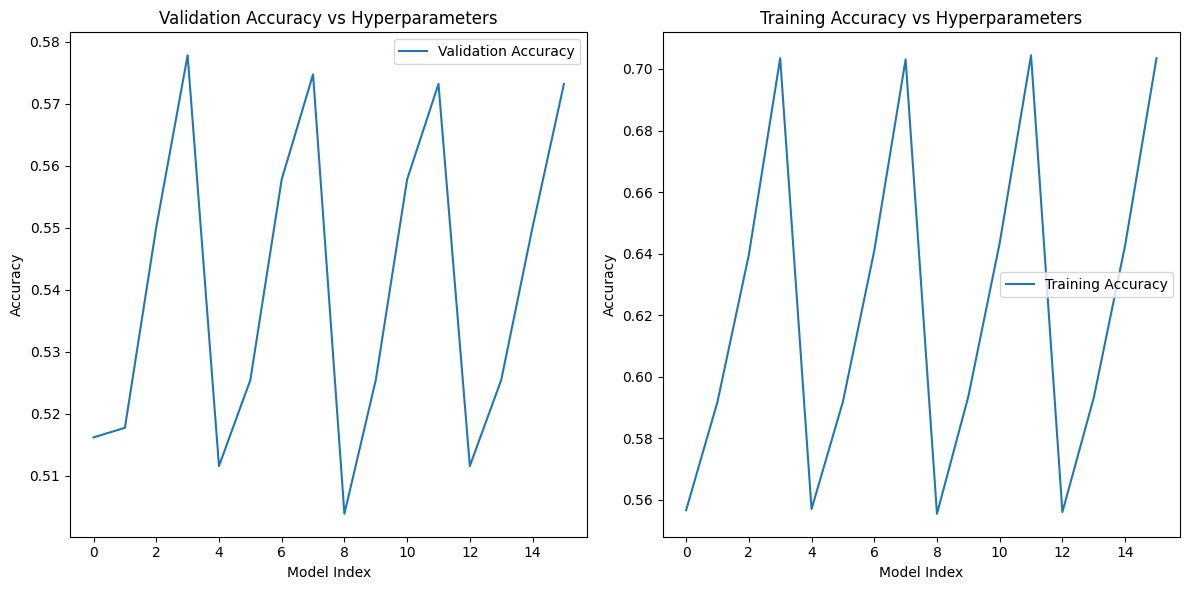

In [53]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimator_test = [i * 100 for i in range(3, 11, 2)]
max_depth_test = [j for j in range(5, 9)]

train_accuracy = []
val_accuracy = []

for i in range(len(n_estimator_test)):
    for j in range(len(max_depth_test)):
        model = RandomForestClassifier(n_estimators=n_estimator_test[i], criterion='entropy', max_features=None, max_depth=max_depth_test[j], random_state=0).fit(X_train, y_train)

        y_pred_val = model.predict(X_val)
        y_pred_train = model.predict(X_train)
       
        val_acc = accuracy_score(y_val, y_pred_val)
        train_acc = accuracy_score(y_train, y_pred_train)
        
        val_accuracy.append(val_acc)
        train_accuracy.append(train_acc)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy vs Hyperparameters')
plt.xlabel('Model Index')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy vs Hyperparameters')
plt.xlabel('Model Index')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


essaie

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_list = [100, 300, 500, 700, 900]  # Essayez différentes valeurs
max_depth_list = [10, 20, 30, None]  # Essayez différentes valeurs

best_accuracy = 0
best_params = {}

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion='entropy', random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth

# Maintenant, utilisez les meilleurs paramètres pour entraîner votre modèle final
final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], criterion='entropy', random_state=0)
final_model.fit(X_train, y_train)

# Évaluez le modèle final sur les données de test
y_pred_test = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Meilleure précision sur les données de validation:", best_accuracy)
print("Précision sur les données de test:", test_accuracy)


Meilleure précision sur les données de validation: 0.674884437596302
Précision sur les données de test: 0.6682027649769585


# Naive Bayes Approach


In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("accuracy with samples:",metrics.accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 651 points : 351
accuracy with samples: 0.4608294930875576


# Artificial Neural Network approach

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(X_train.shape)
shape = (X_train.shape[1], )
output = 7
model = Sequential()
model.add(Dense(192,input_shape = shape, activation = 'relu'))
model.add(Dense(96, activation = 'relu'))
model.add(Dense(32,
                     kernel_regularizer=regularizers.L2(1e-2),
                     activity_regularizer=regularizers.L2(1e-3), activation = 'relu'))
model.add(Dense(output))
model.add(Activation("softmax"))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 1000)
model.evaluate(X_test, y_test)

(5197, 8)
Epoch 1/1000
163/163 [==============================] - 2s 4ms/step - loss: 1.7725 - accuracy: 0.4222 - val_loss: 1.5289 - val_accuracy: 0.4391
Epoch 2/1000
163/163 [==============================] - 0s 2ms/step - loss: 1.4835 - accuracy: 0.4276 - val_loss: 1.4010 - val_accuracy: 0.4391
Epoch 3/1000
163/163 [==============================] - 0s 3ms/step - loss: 1.3836 - accuracy: 0.4374 - val_loss: 1.3309 - val_accuracy: 0.4391
Epoch 4/1000
163/163 [==============================] - 1s 4ms/step - loss: 1.3327 - accuracy: 0.4374 - val_loss: 1.2995 - val_accuracy: 0.4468
Epoch 5/1000
163/163 [==============================] - 1s 4ms/step - loss: 1.3056 - accuracy: 0.4351 - val_loss: 1.2770 - val_accuracy: 0.4468
Epoch 6/1000
163/163 [==============================] - 1s 4ms/step - loss: 1.2828 - accuracy: 0.4426 - val_loss: 1.2573 - val_accuracy: 0.4391
Epoch 7/1000
163/163 [==============================] - 0s 2ms/step - loss: 1.2655 - accuracy: 0.4476 - val_loss: 1.2339 - val

[1.1842372417449951, 0.5514593124389648]

essaie modififer code pour augmenter accuracy :


In [48]:
X = model.history.history['val_accuracy']
Z = model.history.history['accuracy']
Y = [i for i in range(1, 1001)]
plt.plot(Y, Z, label = "train_acc")
plt.plot(Y, X, label = "val_acc")
plt.legend()
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'history'